# Project: Human Resources Dataset Analysis

## Week 2: (1) Exploratory Data Analysis (EDA) And Determine Data Analysis Questions

**This table includes the column names and their descriptions:**

| **#** | **Column Name**                    | **Description**                                                |
|-------|-------------------------------------|---------------------------------------------------------------|
| 1     | EmployeeID                         | Unique identifier for each employee                           |
| 2     | FirstName                          | The first name of the employee                                |
| 3     | LastName                           | The last name of the employee                                 |
| 4     | Gender                             | Gender of the employee (Male, Female, Non-binary)            |
| 5     | Age                                | Age of the employee (in years)                               |
| 6     | BusinessTravel                     | Frequency of business travel (Rarely, Occasionally, Frequent) |
| 7     | Department                         | The department where the employee works                       |
| 8     | DistanceFromHome                   | Distance from the employee's home to work (in kilometers)    |
| 9     | State                              | The state where the employee resides                          |
| 10    | Ethnicity                          | Ethnicity of the employee                                     |
| 11    | EducationField                     | Field of education of the employee (e.g., IT, Marketing)    |
| 12    | JobRole                            | Job title of the employee (e.g., Software Engineer, Sales Executive) |
| 13    | MaritalStatus                      | Marital status of the employee (e.g., Married, Single)       |
| 14    | Salary                             | Salary of the employee (in local currency)                   |
| 15    | StockOptionLevel                   | Level of stock options granted to the employee (number of shares) |
| 16    | OverTime                           | Whether the employee works overtime (Yes or No)              |
| 17    | HireDate                           | Date of hiring the employee (in date format)                 |
| 18    | Attrition                          | Whether the employee left the company (Yes or No)            |
| 19    | YearsAtCompany                     | Number of years the employee has been with the company       |
| 20    | YearsInMostRecentRole              | Number of years the employee has been in the most recent role |
| 21    | YearsSinceLastPromotion             | Number of years since the last promotion of the employee      |
| 22    | YearsWithCurrManager               | Number of years the employee has worked with the current manager |
| 23    | EducationLevel                     | Level of education (e.g., Bachelor's, Master's)              |
| 24    | PerformanceID                      | Performance evaluation identifier for the employee            |
| 25    | ReviewDate                         | Date of the last performance review for the employee          |
| 26    | TrainingOpportunitiesWithinYear    | Number of training opportunities available within the year    |
| 27    | TrainingOpportunitiesTaken         | Number of training opportunities taken                         |
| 28    | EnvironmentSatisfactionLevel       | Level of satisfaction with the work environment (Scale 1 to 5) |
| 29    | JobSatisfactionLevel               | Level of satisfaction with the job (Scale 1 to 5)            |
| 30    | RelationshipSatisfactionLevel      | Level of satisfaction with workplace relationships (Scale 1 to 5) |
| 31    | WorkLifeBalanceLevel               | Level of work-life balance (Scale 1 to 5)                     |
| 32    | SelfRatingLevel                    | Self-rating of the employee (Scale 1 to 5)                    |
| 33    | ManagerRatingLevel                 | Manager's rating of the employee (Scale 1 to 5)               |


In [1]:
# import Libraries
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import pyodbc

pd.options.display.max_rows = None

pd.options.display.max_columns = None
sns.set()


In [2]:
import pyodbc
import pandas as pd


def read_sql_query(query):
    
    server = 'DESKTOP-0CQ5N9B' 
    database = 'HR_system' 
    
    # SQL Authentication
    connection_string = (
        f"Driver={{ODBC Driver 17 for SQL Server}};" 
        f"Server={server};" 
        f"Database={database};"
        f"Trusted_Connection=yes;" 
    )

    # Creating connection
    try:
        connection = pyodbc.connect(connection_string) 
        print("Connection successful!")

        # Use cursor to execute query
        cursor = connection.cursor()
        cursor.execute(query)
        
        # Get results
        rows = cursor.fetchall()
        columns = [column[0] for column in cursor.description] 
        
        # Creating DataFrame
        df = pd.DataFrame.from_records(rows, columns=columns)

        return df

    except Exception as e:
        print(f"Error: {e}")
        connection.close()
        return None  
    
    finally:
        # close connection
        connection.close()



# Employees

In [3]:
pth= "../00-Dataset_Data_Model/"
#df_employees = pd.read_csv(f"{pth}06-All_Data_Employees.csv")

## Load Dataset of All_Data_Employees.csv (the view "FullEmployeePerformanceView")
query = """SELECT * FROM FullEmployeePerformanceView;"""

df_employees = read_sql_query(query)

df_employees.head()

Connection successful!


,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome,State,Ethnicity,EducationField,JobRole,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,EducationLevel,PerformanceID,ReviewDate,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,EnvironmentSatisfactionLevel,JobSatisfactionLevel,RelationshipSatisfactionLevel,WorkLifeBalanceLevel,SelfRatingLevel,ManagerRatingLevel
0,001A-8F88,Christy,Jumel,Male,22,Some Travel,Technology,40,CA,White,Information Systems,Software Engineer,Married,27763.0,0,No,2021-09-05,No,1,0,1,0,Masters,None,NaT,NaN,NaN,None,None,None,None,None,None
1,005C-E0FB,Fin,O'Halleghane,Non-Binary,24,Frequent Traveller,Sales,17,CA,White,Marketing,Sales Executive,Married,56155.0,1,No,2017-08-26,No,5,2,2,0,Masters,PR4067,2020-06-17,1.0,2.0,Neutral,Neutral,Dissatisfied,Dissatisfied,Exceeds Expectation,Meets Expectation
2,005C-E0FB,Fin,O'Halleghane,Non-Binary,24,Frequent Traveller,Sales,17,CA,White,Marketing,Sales Executive,Married,56155.0,1,No,2017-08-26,No,5,2,2,0,Masters,PR5070,2021-06-17,1.0,1.0,Satisfied,Satisfied,Very Satisfied,Very Satisfied,Meets Expectation,Meets Expectation
3,005C-E0FB,Fin,O'Halleghane,Non-Binary,24,Frequent Traveller,Sales,17,CA,White,Marketing,Sales Executive,Married,56155.0,1,No,2017-08-26,No,5,2,2,0,Masters,PR6165,2022-06-17,3.0,0.0,Neutral,Satisfied,Very Satisfied,Satisfied,Exceeds Expectation,Exceeds Expectation
4,00A3-2445,Wyatt,Ziehm,Male,30,Some Travel,Technology,6,CA,Black or African American,Computer Science,Machine Learning Engineer,Married,126238.0,0,No,2012-03-08,No,10,3,6,6,High School,PR1165,2016-06-19,2.0,2.0,Satisfied,Very Satisfied,Satisfied,Very Satisfied,Exceeds Expectation,Meets Expectation


In [4]:
# df_employees["HireDate"]=pd.to_datetime(df_employees["HireDate"], format='%Y-%m-%d', errors='coerce')
# Display df_employees data information
df_employees.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6899 entries, 0 to 6898
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   EmployeeID                       6899 non-null   object        
 1   FirstName                        6899 non-null   object        
 2   LastName                         6899 non-null   object        
 3   Gender                           6899 non-null   object        
 4   Age                              6899 non-null   int64         
 5   BusinessTravel                   6899 non-null   object        
 6   Department                       6899 non-null   object        
 7   DistanceFromHome                 6899 non-null   int64         
 8   State                            6899 non-null   object        
 9   Ethnicity                        6899 non-null   object        
 10  EducationField                   6899 non-null   object     


## Summary statistics

In [5]:
numeric_df_employees = [
    "Age",
    "DistanceFromHome",
    "Salary",
    "StockOptionLevel",
    "HireDate",
    "YearsAtCompany",
    "YearsInMostRecentRole",
    "YearsSinceLastPromotion",
    "YearsWithCurrManager",
    "ReviewDate", 
    "TrainingOpportunitiesWithinYear",
    "TrainingOpportunitiesTaken"
]

categorical_df_employees =[
    "Gender",
    "BusinessTravel",
    "Department",
    "State",
    "Ethnicity",
    "EducationField",
    "JobRole",
    "MaritalStatus",
    "OverTime",
    "Attrition",
    "EducationLevel",
    "EnvironmentSatisfactionLevel", 
    "JobSatisfactionLevel", 
    "RelationshipSatisfactionLevel",
    "WorkLifeBalanceLevel", 
    "SelfRatingLevel",
    "ManagerRatingLevel"
]




#### **Numeric Columns Table:**

| **#** | **Column Name**                    | **Description**                                          |
|-------|-------------------------------------|---------------------------------------------------------|
| 1     | Age                                | The age of the employee (in years)                     |
| 2     | DistanceFromHome                   | The distance from the employee's home to work (in km)  |
| 3     | Salary                             | The employee's salary (in local currency)              |
| 4     | StockOptionLevel                   | The level of stock options granted to the employee (number of shares) |
| 5     | HireDate                           | The date of hiring the employee (in date format)       |
| 6     | YearsAtCompany                     | The number of years the employee has been with the company |
| 7     | YearsInMostRecentRole              | The number of years the employee has spent in their most recent role |
| 8     | YearsSinceLastPromotion             | The number of years since the employee's last promotion |
| 9     | YearsWithCurrManager               | The number of years the employee has worked with the current manager |
| 10    | ReviewDate                         | The date of the employee's last performance review      |
| 11    | TrainingOpportunitiesWithinYear    | The number of training opportunities available within the year |
| 12    | TrainingOpportunitiesTaken         | The number of training opportunities that have been taken |


In [6]:
# Summary statistics of numeric
df_employees[numeric_df_employees].describe()

,Age,DistanceFromHome,Salary,StockOptionLevel,HireDate,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager,ReviewDate,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken
count,6899.000000,6899.000000,6899.000000,6899.000000,6899,6899.000000,6899.000000,6899.000000,6899.000000,6709,6709.000000,6709.000000
mean,30.604146,22.327874,110898.374112,0.725467,2016-01-12 15:39:53.564284416,5.578055,2.778953,4.143934,2.741412,2019-04-14 05:12:04.936652288,2.012968,1.017290
min,18.000000,1.000000,20387.000000,0.000000,2012-01-03 00:00:00,0.000000,0.000000,0.000000,0.000000,2013-01-02 00:00:00,1.000000,0.000000
25%,25.000000,12.000000,44646.000000,0.000000,2013-07-02 00:00:00,3.000000,0.000000,1.000000,0.000000,2017-05-21 00:00:00,1.000000,0.000000
50%,28.000000,22.000000,74458.000000,1.000000,2015-05-19 00:00:00,6.000000,2.000000,4.000000,2.000000,2019-09-15 00:00:00,2.000000,1.000000
75%,36.000000,33.000000,137219.500000,1.000000,2018-06-11 00:00:00,9.000000,5.000000,7.000000,5.000000,2021-06-01 00:00:00,3.000000,2.000000
max,51.000000,45.000000,547204.000000,3.000000,2022-12-31 00:00:00,10.000000,10.000000,10.000000,10.000000,2022-12-31 00:00:00,3.000000,3.000000
std,7.986542,12.899799,98427.862382,0.839724,NaN,3.410087,2.810170,3.203770,2.792284,NaN,0.820310,0.950316


_________________________________________________________________

#### **Categorical Columns Table:**

| **#** | **Column Name**                    | **Description**                                          |
|-------|-------------------------------------|---------------------------------------------------------|
| 1     | Gender                             | The gender of the employee (Male, Female, Non-binary)  |
| 2     | BusinessTravel                     | Frequency of business travel (Rarely, Sometimes, Frequently) |
| 3     | Department                         | The department the employee works in                    |
| 4     | State                              | The state where the employee resides                     |
| 5     | Ethnicity                          | The ethnicity of the employee                           |
| 6     | EducationField                     | The field of education of the employee (e.g., Information Technology, Marketing) |
| 7     | JobRole                            | The job role of the employee (e.g., Software Engineer, Sales Representative) |
| 8     | MaritalStatus                      | The marital status of the employee (e.g., Married, Single) |
| 9     | OverTime                           | Whether the employee works overtime (Yes or No)        |
| 10     | Attrition                          | Whether the employee has left the company (Yes or No)  |
| 11    | EducationLevel                     | The level of education (e.g., Bachelor's, Master's)    |
| 12    | EnvironmentSatisfactionLevel       | The level of satisfaction with the work environment (Scale of 1 to 5) |
| 13    | JobSatisfactionLevel               | The level of satisfaction with the job (Scale of 1 to 5) |
| 14    | RelationshipSatisfactionLevel      | The level of satisfaction with workplace relationships (Scale of 1 to 5) |
| 15    | WorkLifeBalanceLevel               | The level of work-life balance (Scale of 1 to 5)       |
| 16    | SelfRatingLevel                    | The employee's self-rating (Scale of 1 to 5)           |
| 17    | ManagerRatingLevel                 | The manager's rating of the employee (Scale of 1 to 5)  |


In [7]:
# Summary statistics of categorical
df_employees[categorical_df_employees].describe(include=[object]).T


,count,unique,top,freq
Gender,6899,4,Female,3171
BusinessTravel,6899,3,Some Travel,4871
Department,6899,3,Technology,4375
State,6899,3,CA,4162
Ethnicity,6899,7,White,3497
EducationField,6899,9,Computer Science,2039
JobRole,6899,13,Sales Executive,1567
MaritalStatus,6899,3,Married,2922
OverTime,6899,2,No,4618
Attrition,6899,2,No,4638


In [8]:
# Summary statistics of categorical
for cat_df in categorical_df_employees:
    print(f"Summary statistics of: {cat_df}")
    print((df_employees[cat_df].value_counts(normalize=True)*100).to_string(index=True, header=True,float_format='%.2f%%'))
    print("\n")  


Summary statistics of: Gender
Gender
Female              45.96%
Male                44.33%
Non-Binary           8.75%
Prefer Not To Say    0.96%


Summary statistics of: BusinessTravel
BusinessTravel
Some Travel          70.60%
Frequent Traveller   20.21%
No Travel             9.19%


Summary statistics of: Department
Department
Technology        63.41%
Sales             32.05%
Human Resources    4.54%


Summary statistics of: State
State
CA   60.33%
NY   27.60%
IL   12.07%


Summary statistics of: Ethnicity
Ethnicity
White                              50.69%
Mixed or multiple ethnic groups    15.93%
Black or African American          15.83%
Asian or Asian American             9.90%
American Indian or Alaska Native    4.12%
Native Hawaiian                     2.28%
Other                               1.26%


Summary statistics of: EducationField
EducationField
Computer Science      29.56%
Information Systems   23.13%
Marketing             11.62%
Marketing             11.42%
Business St

__________________________________

## Summary Based on the previous analysis and considering the company's HR interest in studying the factors influencing employee retention, the following questions have been identified:

1. **Do employees who live more than 20 miles away `DistanceFromHome` have a higher tendency to leave the company `Attrition`?**

2. **Are employees who have a higher level of satisfaction with the work environment `EnvironmentSatisfactionLevel` more likely to stay at the company  `Attrition`?**

3. **Are employees who receive more training opportunities `TrainingOpportunitiesTaken` less likely to leave the company `Attrition`?**

4. **Does an increase in salary `Salary` positively impact employee retention `Attrition`?**

5. **Does working overtime `OverTime` negatively affect employee retention `Attrition`?**

6. **Is there a correlation between an employee’s gender `Gender` and retention rate `Attrition`?**

7. **Are employees who frequently travel for business `BusinessTravel` more likely to leave the company `Attrition` compared to others?**


_____________________________________________________
_________________________________________

In [125]:
### The basic function for making graphs and statistics.
def myBarPercent(df, x, y, r, c, l):
    axs = plt.subplot(r, c, l)
    g = df.groupby(y)[x].value_counts(normalize=True).unstack(y).plot.bar(rot=0, ax=axs)
    
    for p in g.patches:
        g.annotate(f'{str(round(p.get_height() * 100, 2))}%', (p.get_x() + 0.5 * p.get_width(), p.get_height()), 
                   ha="center", va="bottom", fontsize=14, weight="bold")
    
    plt.title(f'Percentage for {x}'.title(), fontsize=14, weight="bold")
    plt.xlabel(x.title())
    plt.ylabel("Percentage")
#_____________________________________________________________________________________________________________________________________________________
### Modified myBarPercent for Categorical (x) and Numerical (y)
def myBarPercent_Mean(df, x_numerical, y_categorical, r, c, l):
    axs = plt.subplot(r, c, l)
    # Group by the categorical variable and calculate the mean of the numerical variable
    grouped_df = df.groupby(y_categorical)[x_numerical].mean().unstack(y_categorical)
    
    # Plot the average of numerical variable for each category
    g = grouped_df.plot(kind='bar', ax=axs, rot=0)
    for p in g.patches:
        g.annotate(f'{str(round(p.get_height(), 2))}', (p.get_x() + 0.5 * p.get_width(), p.get_height()), 
                   ha="center", va="bottom", fontsize=14, weight="bold")
    
    plt.title(f'Average of {x_numerical} for {y_categorical}'.title(), fontsize=14, weight="bold")
    plt.xlabel(y_categorical.title())
    plt.ylabel(f'Average {x_numerical.title()}')

#_____________________________________________________________________________________________________________________________________________________
### Function to calculate and annotate percentage count for Categorical (x) and Numerical (y)
def myBarPercent_q5(df, x_numerical, y_categorical, fig=[12, 5]):
    # Divide numerical variable into bins (for better visualization) if needed
    df['binned'] = pd.qcut(df[x_numerical], q=5)  # Create 5 bins based on numerical variable
    
    # Plot the count of the categorical variable within each bin of numerical variable
    g = sns.countplot(x=df[y_categorical], hue=df['binned'])
    ttl = df[y_categorical].count()
    for p in g.patches:
        g.annotate(f'{str(round(p.get_height() / ttl * 100, 2))}%', 
                   (p.get_x() + 0.5 * p.get_width(), p.get_height()), 
                   ha="center", va="bottom", fontsize=14, weight="bold")
    
    sns.set(rc={'figure.figsize': list(fig)}, font_scale=1.2)
    plt.title(f'Count of {y_categorical} vs Binned {x_numerical}')
    plt.xlabel(y_categorical.title())
    plt.ylabel("Count Percentage")
#_____________________________________________________________________________________________________________________________________________________
### Function to calculate and annotate percentage count
def CountPercent(df, x, fig=[7, 3]):
    g = sns.countplot(x=df[x])
    ttl = df[x].count()
    for p in g.patches:
        g.annotate(f'{str(round(p.get_height() / ttl * 100, 2))}%', (p.get_x() + 0.5 * p.get_width(), p.get_height()), 
                   ha="center", va="bottom", fontsize=14, weight="bold")
    sns.set(rc={'figure.figsize': list(fig)}, font_scale=1.2)

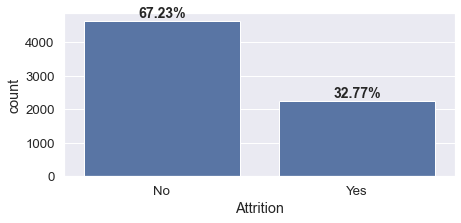

Attrition
No     4638
Yes    2261
Name: count, dtype: int64

In [102]:
CountPercent(df_employees,"Attrition")
df_employees["Attrition"].value_counts()

1. **Do employees who live more than 20 miles away `DistanceFromHome` have a higher tendency to leave the company `Attrition`?**

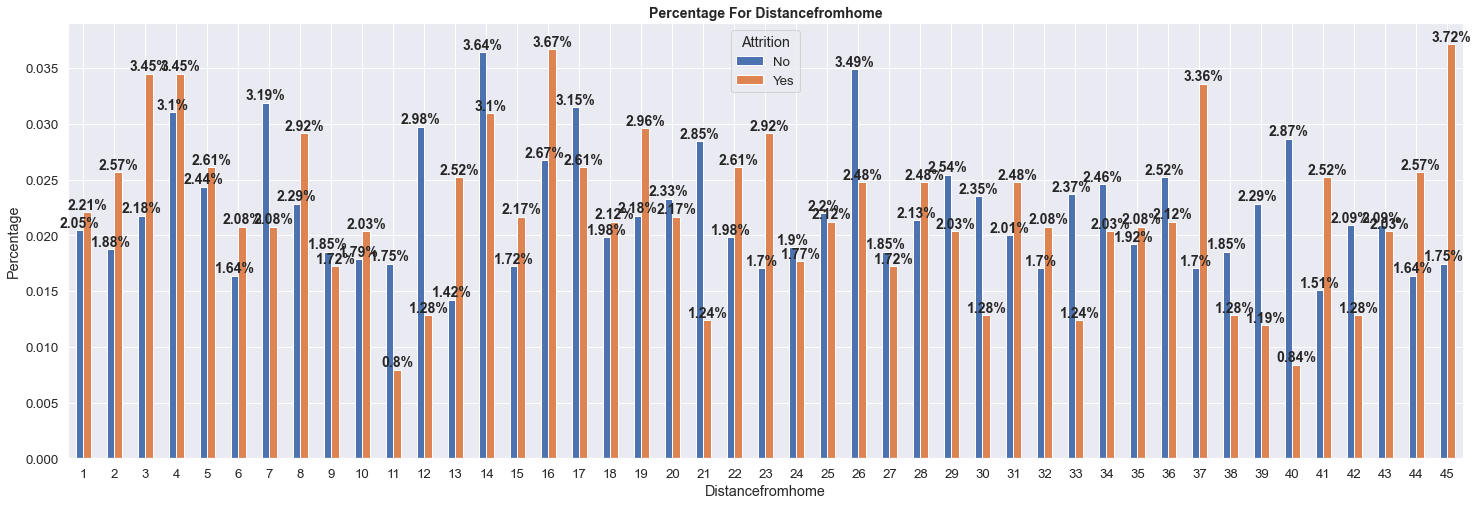

In [88]:
#left_more_than_20_miles = df_employees[df_employees["DistanceFromHome"] > 20]
plt.subplots(figsize=[25,8])
myBarPercent(df_employees, 'DistanceFromHome', 'Attrition', 1, 1, 1)

**No**

2. **Are employees who have a higher level of satisfaction with the work environment `EnvironmentSatisfactionLevel` more likely to stay at the company  `Attrition`?**

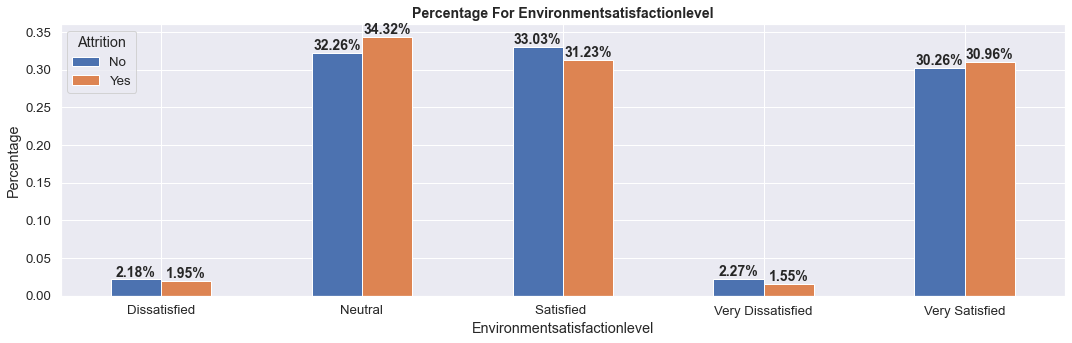

EnvironmentSatisfactionLevel
Neutral              2211
Satisfied            2175
Very Satisfied       2046
Dissatisfied          141
Very Dissatisfied     136
Name: count, dtype: int64

In [129]:
plt.subplots(figsize=[18,5])
myBarPercent(df_employees, 'EnvironmentSatisfactionLevel', 'Attrition', 1, 1, 1)
df_employees["EnvironmentSatisfactionLevel"].value_counts()

No

3. **Are employees who receive more training opportunities `TrainingOpportunitiesTaken` less likely to leave the company `Attrition`?**

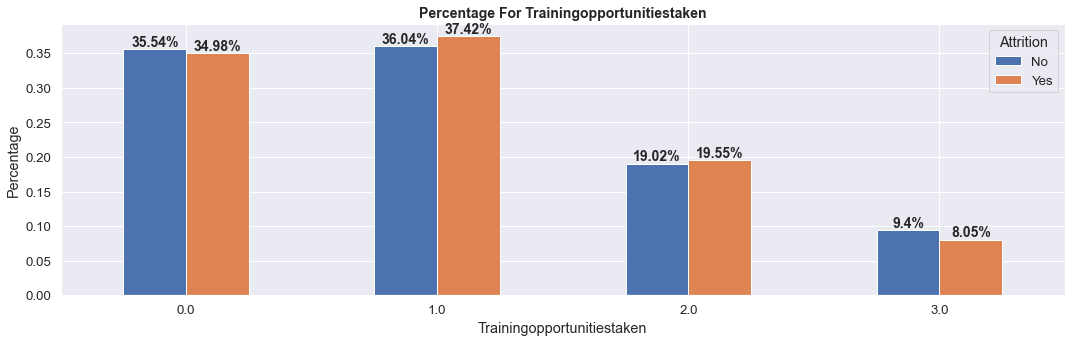

In [78]:
plt.subplots(figsize=[18,5])
myBarPercent(df_employees, 'TrainingOpportunitiesTaken', 'Attrition', 1, 1, 1)



No

4. **Does an increase in salary `Salary` positively impact employee retention `Attrition`?**

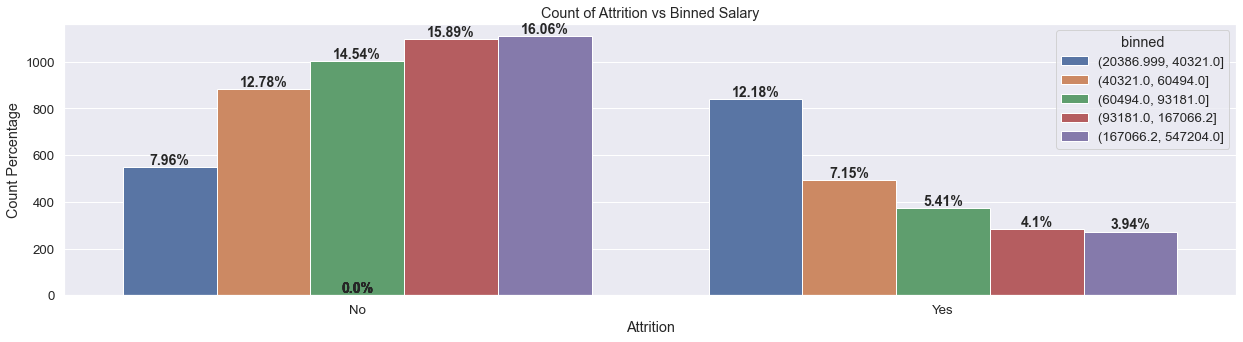

In [126]:
plt.subplots(figsize=[21,5])
myBarPercent_q5(df_employees, 'Salary', 'Attrition')

Yes

5. **Does working overtime `OverTime` negatively affect employee retention `Attrition`?**

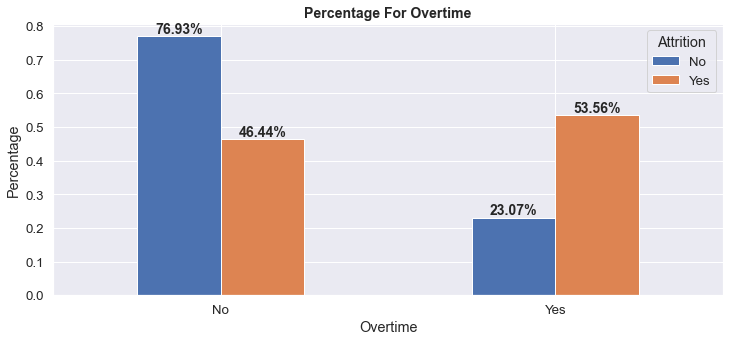

In [98]:
plt.subplots(figsize=[12,5])
myBarPercent(df_employees, 'OverTime', 'Attrition',1,1,1)

Yes

6. **Is there a correlation between an employee’s gender `Gender` and retention rate `Attrition`?**

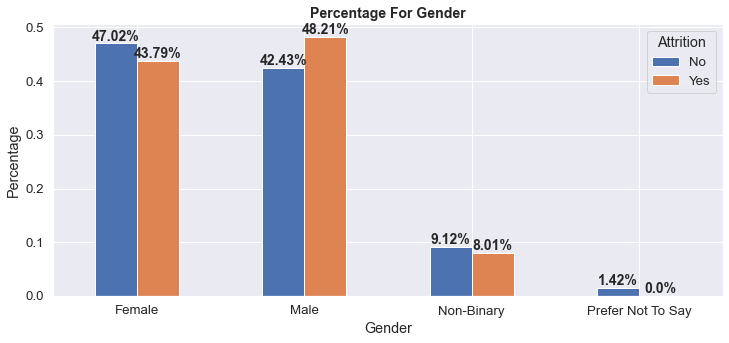

In [97]:
plt.subplots(figsize=[12,5])
myBarPercent(df_employees, 'Gender', 'Attrition',1,1,1)

Yes

7. **Are employees who frequently travel for business `BusinessTravel` more likely to leave the company `Attrition` compared to others?**

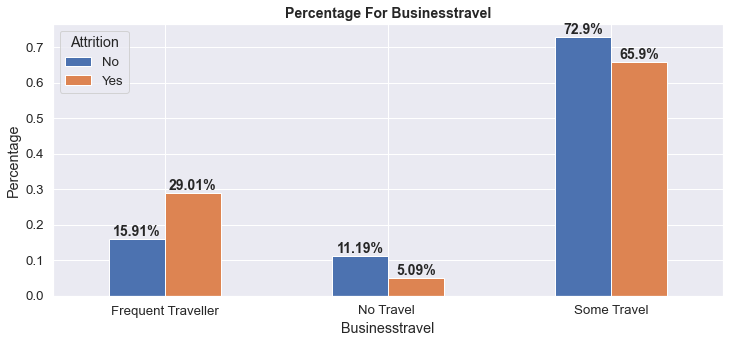

BusinessTravel
Some Travel           4871
Frequent Traveller    1394
No Travel              634
Name: count, dtype: int64

In [100]:
plt.subplots(figsize=[12,5])
myBarPercent(df_employees, 'BusinessTravel', 'Attrition',1,1,1)
df_employees["BusinessTravel"].value_counts()

Yes

__________________________

### Results

1. The `Distance From Home` exceeding 20 miles does not have a significant impact on employee turnover.
   
2. Higher `Job Satisfaction` does not show a clear influence on employees' decision to remain with the company.

3. Providing additional `Training Opportunities` does not significantly affect employee retention.

4. An increase in `Salary` positively impacts employee retention, with higher salaries leading to a greater likelihood of employees staying.

5. `OverTime` negatively affects employee retention, contributing to a higher likelihood of turnover.

6. There is a notable relationship between `Gender` and retention rates. Female employees are less likely to leave the company compared to their male counterparts.

7. Employees who frequently travel for `Business Travel` are more likely to leave the company compared to those who travel less frequently.


### Summary

The analysis indicates that certain factors, such as `Salary` increases and `Gender`, significantly influence employee retention, with higher salaries leading to longer tenures and female employees being less likely to leave the company. However, other factors, including `Job Satisfaction`, `Distance From Home`, and `Training Opportunities`, do not show a clear or strong impact on retention. Additionally, `OverTime` and frequent `Business Travel` are associated with higher turnover rates.

While these findings provide useful insights, further in-depth analysis and verification are needed to understand better the complex dynamics between these variables and employee retention.

# END